# Visualization of Ben Recht dataset using t-SNE

In [1]:
import pandas as pd
import numpy as np
import torch
import time

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Loading dataset

In [9]:
import sys
from os import path
sys.path.append(path.abspath('../CIFAR_modified/code'))
import CIFAR_modified
from CIFAR_modified.code import utils

version = 'v4'
images, labels = utils.load_new_test_data(version)
images = images.transpose(0, 3, 1, 2)
num_images = images.shape[0]
images = images.astype(np.float32)/255.0
labels = labels.astype(np.int64)
print('\nLoaded version "{}" of the CIFAR-10.1 dataset.'.format(version))
print('There are {} images in the dataset.'.format(num_images))
print(images.dtype)

Loading labels from file /home/rosh/dev/semisup-adv/CIFAR_modified/datasets/cifar10.1_v4_labels.npy
Loading image data from file /home/rosh/dev/semisup-adv/CIFAR_modified/datasets/cifar10.1_v4_data.npy

Loaded version "v4" of the CIFAR-10.1 dataset.
There are 2021 images in the dataset.
float32


In [12]:
images.shape
images = images.flatten().reshape(2021, -1)
images.shape

(2021, 3072)

In [18]:
labels.shape
labels
feat_cols = [ 'pixel'+str(i) for i in range(images.shape[1]) ]

# feat_cols

In [20]:
df = pd.DataFrame(images, columns=feat_cols)
df['y'] = labels
df['label'] = df['y'].apply(lambda i: str(i))
print(f'Df shape: {df.shape}')

Df shape: (2021, 3074)


In [21]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [22]:
data = df[feat_cols].values

In [23]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2021 samples in 0.457s...
[t-SNE] Computed neighbors for 2021 samples in 24.681s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2021
[t-SNE] Computed conditional probabilities for sample 2000 / 2021
[t-SNE] Computed conditional probabilities for sample 2021 / 2021
[t-SNE] Mean sigma: 3.434846
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.610703
[t-SNE] KL divergence after 300 iterations: 2.178565
t-SNE done! Time elapsed: 27.039392471313477 seconds


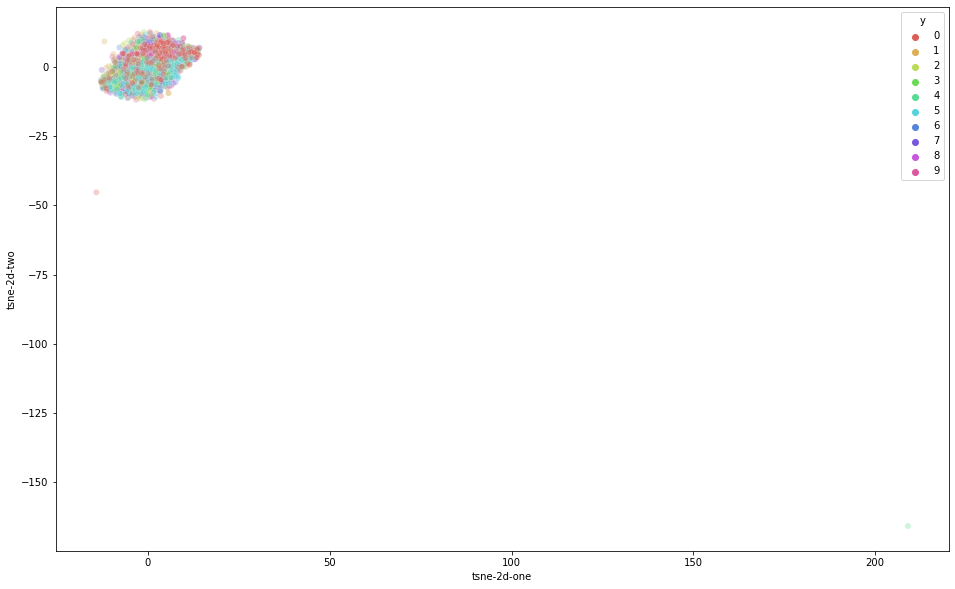

In [25]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)